In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import seaborn as sns

# Member data

Gender column in membership data has a couple of NA's, in fact 65%, so not so much to use for this particular column. The data is distributed over 21 cities.

Total count: 6.8 M members (6769473, and all indeed unique, no duplicate msno's)
- Age [bd]: wildely distributed including negative values (plenty of them), thus have to find out later how useful it would be.
- Gender: as already listed before 65 % unkown, most probably not useful.
- City: distributed among 21 cities, most of the users live in city "1", over 5 M (most probably Taipeh)
- 18 different methods to register, out of those 4 are more wildly used (methods 3,4,7,9), the others are rather negligible.
- users registered starting from March 26, 2004 to April 29, 2017.

In [11]:
df_mem=pd.read_csv("data/members_v3.csv")
df_mem

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


In [20]:
df_mem["registration_init_time_as_dt"]=pd.to_datetime(df_mem["registration_init_time"], format='%Y%m%d', errors='ignore')

Monthly registration numbers show in general an increase up to begin of 2016, then we do observe quite a drop in registration numbers in the dat file but still higher numbers than in 2015

<AxesSubplot:xlabel='registration_init_time_as_dt'>

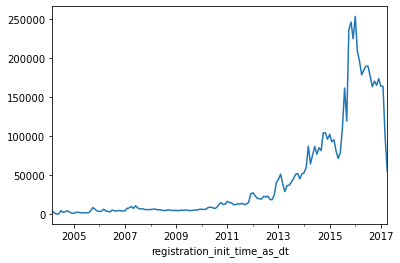

In [28]:
df_mem.groupby(pd.Grouper(key="registration_init_time_as_dt", freq="m")).count()["registration_init_time"].plot()

In [21]:
df_mem

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15
...,...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020,2015-10-20


In [17]:
print(df_mem["registration_init_time"].min(),df_mem["registration_init_time"].max())

20040326 20170429


In [12]:
df_mem.nunique()

msno                      6769473
city                           21
bd                            386
gender                          2
registered_via                 18
registration_init_time       4782
dtype: int64

In [5]:
df_mem.isna().sum()/df_mem.isna().count()

msno                      0.000000
city                      0.000000
bd                        0.000000
gender                    0.654335
registered_via            0.000000
registration_init_time    0.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

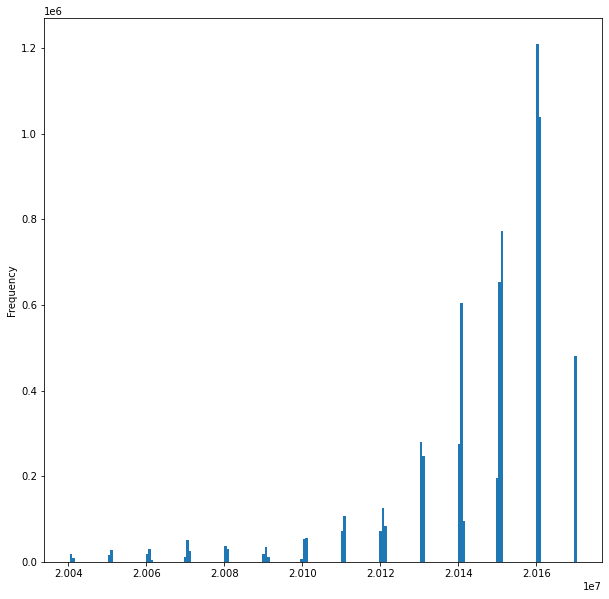

In [19]:
fig, ax = plt.subplots()
df_mem["registration_init_time"].plot(kind="hist",ax=ax,figsize=(10,10),bins=200)

<AxesSubplot:>

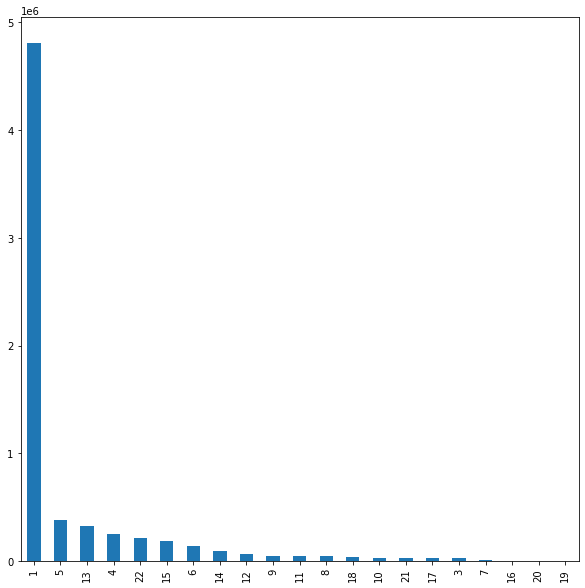

In [15]:
fig, ax = plt.subplots()
df_mem["city"].value_counts().plot(kind="bar",ax=ax,figsize=(10,10))

<AxesSubplot:>

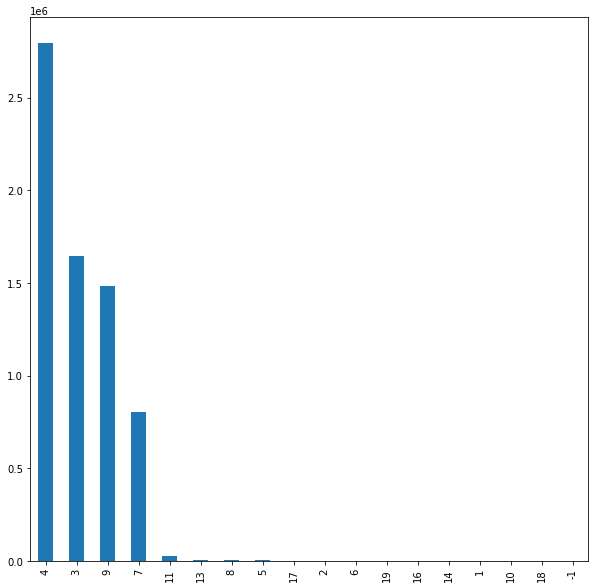

In [16]:
fig, ax = plt.subplots()
df_mem["registered_via"].value_counts().plot(kind="bar",ax=ax,figsize=(10,10))

In [2]:
df_ul=pd.read_csv("data/user_logs_v2.csv")
df_ul.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [39]:
df_train=pd.read_csv("data/train.csv")
df_train.sort_values(by=["msno"])

,msno,is_churn
321092,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0
663804,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0
107459,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0
396726,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0
426433,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0
...,...,...
320038,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0
480976,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,0
888205,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0
19995,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,1


In [40]:
df_train.nunique()

msno        992931
is_churn         2
dtype: int64

In [41]:
df_train_v2=pd.read_csv("data/train_v2.csv")
df_train_v2.sort_values(by=["msno"])

,msno,is_churn
760876,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0
798970,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0
827003,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0
656165,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0
193862,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0
...,...,...
759905,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0
930350,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,0
10783,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1
336622,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0


In [42]:
df_train_v2.nunique()

msno        970960
is_churn         2
dtype: int64

It is obvious that ID's from the first dataframe are also included in the second dataframe, which contains updated values, it is also checked that indeed all ID"s are unique(). Not all ID's of the first train data are included in the V2 train date, will in the following concentrate on the V2 data.

In [35]:
df_train[df_train["msno"].duplicated()]

,msno,is_churn
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1
5,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1
6,kVmM8X4iBPCOfK/m1l3KR7LjFoxD1EcKYCc76F5IAWw=,1
...,...,...
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0


In [5]:
df_tra=pd.read_csv("data/transactions_v2.csv")
df_tra.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [6]:
print(df_tra[df_tra.duplicated(subset=['msno'], keep=False)].shape[0]/df_tra.shape[0])
print(df_tra.shape[0],len(df_tra["msno"].unique()))
df_tra[df_tra.duplicated(subset=['msno'], keep=False)].sort_values(by=['msno']).head(50)

0.26289072954817194
1431009 1197050


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1030112,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,20170228,20170419,0
335565,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,20170331,20170519,0
593491,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,39,30,149,149,1,20170228,20170423,0
1144689,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,39,30,149,149,1,20170331,20170523,0
121150,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,30,149,149,1,20170331,20170504,0
657865,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,30,149,149,1,20170228,20170404,0
1402390,++5BmBHS2ebe4Whfg/7KhGkj/sQ6rtNHsktLxsI01KE=,39,30,149,149,1,20170228,20170401,0
529428,++5BmBHS2ebe4Whfg/7KhGkj/sQ6rtNHsktLxsI01KE=,39,30,149,149,1,20170331,20170501,0
543631,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,39,30,149,149,1,20170331,20170521,0
278318,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,39,30,149,149,1,20170228,20170421,0


In [7]:
print(df_ul.shape,df_mem.shape,df_train.shape,df_tra.shape)

(18396362, 9) (6769473, 6) (970960, 2) (1431009, 9)


In [8]:
print(len(df_ul["msno"].unique()),len(df_mem["msno"].unique()),len(df_train["msno"].unique()),len(df_tra["msno"].unique()))

1103894 6769473 970960 1197050


In [9]:
print("churn rage",len(df_train[df_train["is_churn"]==1]["is_churn"])/len(df_train["is_churn"]))

churn rage 0.08994191315811156


In [10]:
print(df_mem["city"].unique())
print(len(df_mem["city"].unique()))

[ 1  6  4  5 13 22 12 15 11  9 14  8 18 21  3  7 17 10 20 16 19]
21


In [11]:
df_mem.isna().sum()/df_mem.shape[0]

msno                      0.000000
city                      0.000000
bd                        0.000000
gender                    0.654335
registered_via            0.000000
registration_init_time    0.000000
dtype: float64

In [12]:
df_ul.isna().sum()/df_ul.shape[0]

msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64

In [13]:
df_train.isna().sum()/df_train.shape[0]

msno        0.0
is_churn    0.0
dtype: float64

In [14]:
df_tra.isna().sum()/df_tra.shape[0]

msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64

In [15]:
print(len(df_tra["payment_method_id"].unique()),df_tra["payment_plan_days"].unique(),len(df_tra["plan_list_price"].unique()))

37 [ 90  30 410 180 195 100 365 395 360 240   0 450   7 200  60 120 415 400
 270  31   1  14  10  80  70  45  35 230   3 110  21] 48


In [16]:
df_mem["registered_via"].unique()

array([11,  7,  9,  3, 16,  4, 13, 17,  5,  2, 19,  8,  6, 14,  1, 18, 10,
       -1])

In [17]:
df_merge=pd.merge(df_train, df_mem, how='left', on='msno')
print(df_merge.shape, df_mem.shape, df_train.shape)
df_merge.head(20)

(970960, 7) (6769473, 6) (970960, 2)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0
5,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,22.0,0.0,NaN,3.0,20140126.0
6,kVmM8X4iBPCOfK/m1l3KR7LjFoxD1EcKYCc76F5IAWw=,1,1.0,0.0,NaN,7.0,20140129.0
7,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.0,28.0,female,3.0,20140202.0
8,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,13.0,21.0,female,9.0,20140212.0
9,otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=,1,13.0,0.0,NaN,7.0,20140228.0


In [18]:
df_tra[df_tra["msno"]=="8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ="].head(20)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
229350,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150908,20170608,0
394200,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150908,20170708,0
394201,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151208,20171208,0
408588,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151108,20171008,0
415886,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151008,20170908,0
473042,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151008,20170808,0
938486,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151108,20171107,0
1024150,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150808,20170509,0
1282069,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151208,20180108,0
1389270,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150808,20170408,0


In [19]:
df_merge_tra=pd.merge(df_merge, df_tra, how='left', on='msno')
print(df_merge_tra.shape,df_merge.shape, df_tra.shape)
df_merge_tra.head(20)

(1169418, 15) (970960, 7) (1431009, 9)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0
5,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0,41.0,30.0,149.0,149.0,1.0,20150908.0,20170708.0,0.0
6,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0,41.0,30.0,149.0,149.0,1.0,20151208.0,20171208.0,0.0
7,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0,41.0,30.0,149.0,149.0,1.0,20151108.0,20171008.0,0.0
8,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0,41.0,30.0,149.0,149.0,1.0,20151008.0,20170908.0,0.0
9,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0,41.0,30.0,149.0,149.0,1.0,20151008.0,20170808.0,0.0


We checked already previously, that for some ID's we have two entries in the transaction database. Some of those are present due to a change of plan, change of payments. Typically there are two entries per user, in total 26 % of all transaction data is coming from users wich two (or more ntries). Thus I would expect the after merging the transaction and the membership/churn dataframe, that the shape does increase. 

In [20]:
df_merge_tra.dtypes

msno                       object
is_churn                    int64
city                      float64
bd                        float64
gender                     object
registered_via            float64
registration_init_time    float64
payment_method_id         float64
payment_plan_days         float64
plan_list_price           float64
actual_amount_paid        float64
is_auto_renew             float64
transaction_date          float64
membership_expire_date    float64
is_cancel                 float64
dtype: object

In [21]:
df_merge_tra["registration_init_time"]=pd.to_datetime(df_merge_tra["registration_init_time"],format="%Y%m%d")
df_merge_tra["transaction_date"]=pd.to_datetime(df_merge_tra["transaction_date"],format="%Y%m%d")
df_merge_tra["membership_expire_date"]=pd.to_datetime(df_merge_tra["membership_expire_date"],format="%Y%m%d")
df_merge_tra.head(10)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0
5,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-07-08,0.0
6,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-12-08,2017-12-08,0.0
7,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-11-08,2017-10-08,0.0
8,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-10-08,2017-09-08,0.0
9,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-10-08,2017-08-08,0.0


In [22]:
df_ul["date"]=pd.to_datetime(df_ul["date"],format="%Y%m%d")
df_ul.head(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558
5,qR/ndQ5B+1cY+c9ihwLoiz+RFiqEnGyQKo32ZErEVKo=,2017-03-31,3,0,0,0,39,41,9786.842
6,N6ch5ArfJixq9mvARJv9ip1D11uvDVazz6Qup5mX7DI=,2017-03-30,9,1,0,0,18,26,4920.255
7,JEjl2W1ivEI6epeobW3n5rDg/r6PJm4OJhtmhwYaQIc=,2017-03-31,181,68,5,3,54,291,22433.105
8,lPK4IYIFdfTT6pq7x2dSV1Vy9j9hNMWzf7XfYBUBz5E=,2017-03-31,3,0,1,1,181,150,46240.281
9,cDgnvwQwCwru2m3zcSuK5oTr6pr1nMPQ/6RerOmxrs0=,2017-03-31,5,4,1,1,30,31,7881.618


Maybe make a second category for returning customers, else need to dense down the information per user for example from the logs, look at the distributions and have for example a look at the ratio of num_25/mum_50 etc songs, or look at the average number of seconds spend things like that.

In [23]:
df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)].head(50)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0
5,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-07-08,0.0
6,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-12-08,2017-12-08,0.0
7,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-11-08,2017-10-08,0.0
8,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-10-08,2017-09-08,0.0
9,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-10-08,2017-08-08,0.0
10,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-11-08,2017-11-07,0.0
11,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-08-08,2017-05-09,0.0


In [24]:
print(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)].shape)
print(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1].shape)
print("count of churns in transaction dupolicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique()))
print("count of no churns in transaction dupolicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==0]["msno"].unique()))
print("churn rate in transaction duplicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique())/len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)]["msno"].unique()))
print("overall churn rate",len(df_merge[df_merge["is_churn"]==1]["msno"].unique())/len(df_merge["msno"].unique()))
print("no churn rate in no duplicates transaction data")
print(df_merge_tra[df_merge_tra["is_churn"]==0].drop_duplicates(subset=['msno'],keep=False).count()/df_merge_tra.drop_duplicates(subset=['msno'],keep=False).count())
#print(len(df_merge_tra[not df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique())/len(df_merge_tra[df_merge_tra.duplica

(314447, 15)
(78598, 15)
count of churns in transaction dupolicates 22920
count of no churns in transaction dupolicates 948040
churn rate in transaction duplicates 0.19760494529653674
overall churn rate 0.08994191315811156
no churn rate in no duplicates transaction data
msno                      0.924664
is_churn                  0.924664
city                      0.919113
bd                        0.919113
gender                    0.872931
registered_via            0.919113
registration_init_time    0.919113
payment_method_id         0.957222
payment_plan_days         0.957222
plan_list_price           0.957222
actual_amount_paid        0.957222
is_auto_renew             0.957222
transaction_date          0.957222
membership_expire_date    0.957222
is_cancel                 0.957222
dtype: float64


We wondered how we should deal with the duplicate entries (with respect to userID) in the transaction data. If we check the amount of churns in terms of total members, the rate is about 8.9%. If we consider now duplicate appearance in the transaction, the people who churned appear there with about 19.8 %, so more as double the rate. Thus it is something which we should investigate further. The rate of churns is lower than average in the transaction data when duplicates are removed

array([[<AxesSubplot:title={'center':'is_churn'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'bd'}>],
       [<AxesSubplot:title={'center':'registered_via'}>,
        <AxesSubplot:title={'center':'payment_method_id'}>,
        <AxesSubplot:title={'center':'payment_plan_days'}>],
       [<AxesSubplot:title={'center':'plan_list_price'}>,
        <AxesSubplot:title={'center':'actual_amount_paid'}>,
        <AxesSubplot:title={'center':'is_auto_renew'}>],
       [<AxesSubplot:title={'center':'is_cancel'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

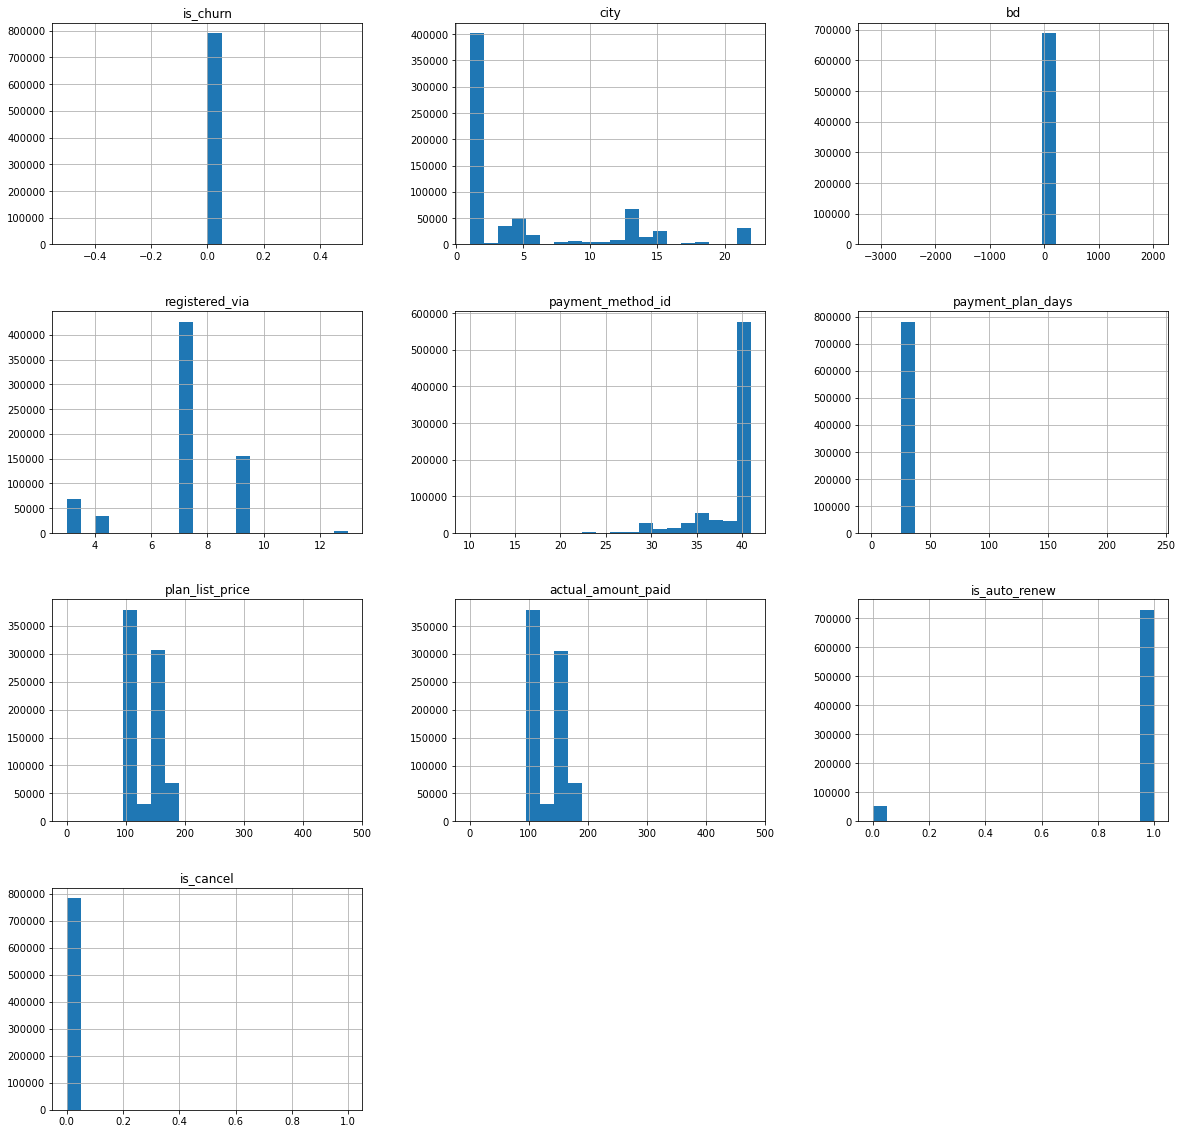

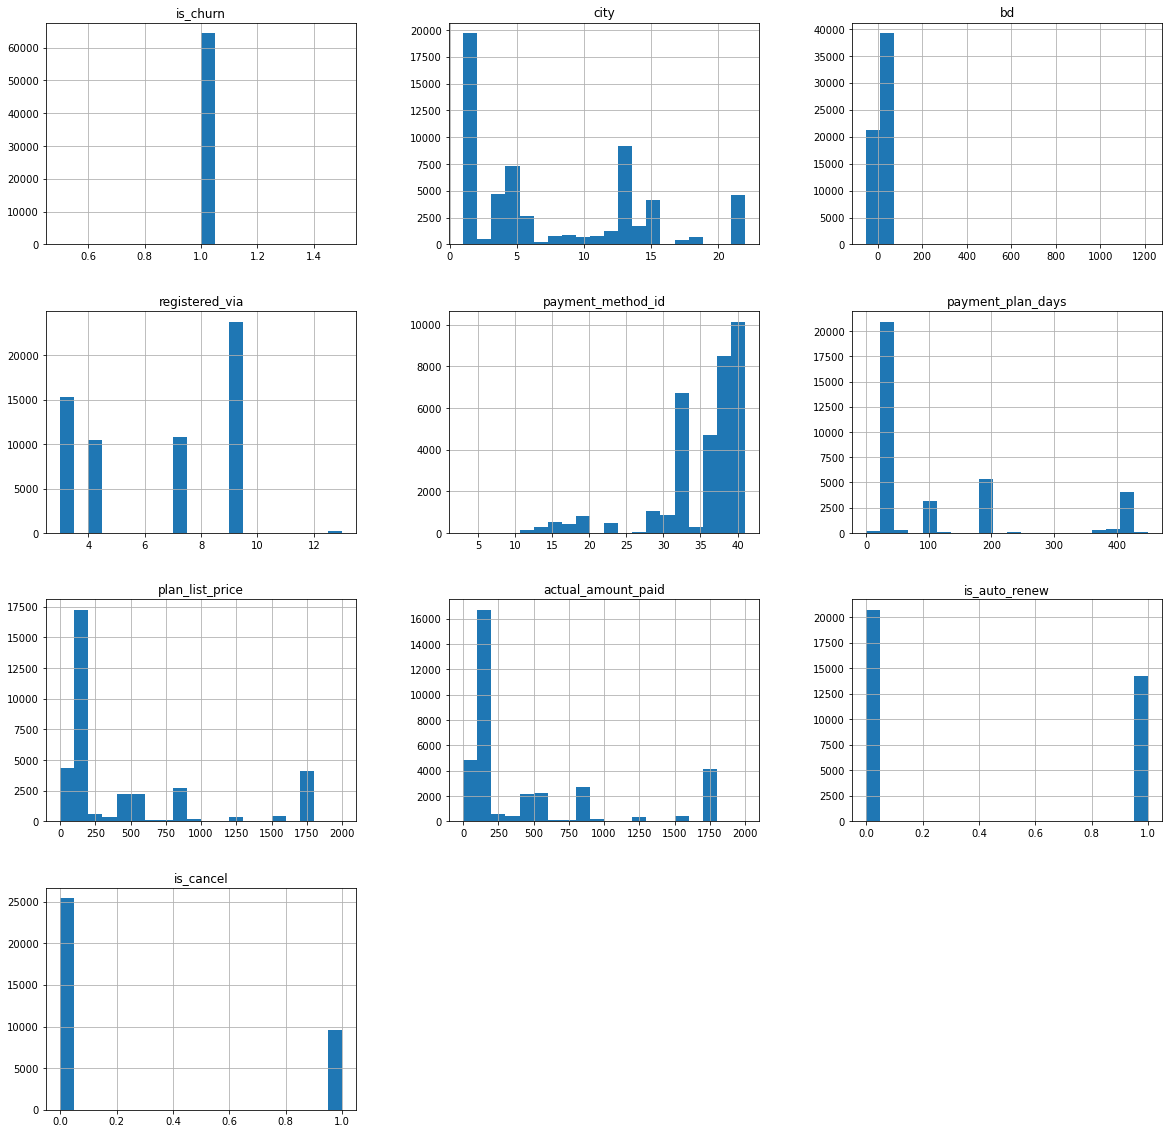

In [25]:
#fig, ax = plt.subplots()
df_merge_tra[df_merge_tra["is_churn"]==0].drop_duplicates(subset=['msno'],keep=False).hist(figsize=(20,20),bins=20)
df_merge_tra[df_merge_tra["is_churn"]==1].drop_duplicates(subset=['msno'],keep=False).hist(figsize=(20,20),bins=20)

array([[<AxesSubplot:title={'center':'is_churn'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'bd'}>],
       [<AxesSubplot:title={'center':'registered_via'}>,
        <AxesSubplot:title={'center':'payment_method_id'}>,
        <AxesSubplot:title={'center':'payment_plan_days'}>],
       [<AxesSubplot:title={'center':'plan_list_price'}>,
        <AxesSubplot:title={'center':'actual_amount_paid'}>,
        <AxesSubplot:title={'center':'is_auto_renew'}>],
       [<AxesSubplot:title={'center':'is_cancel'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

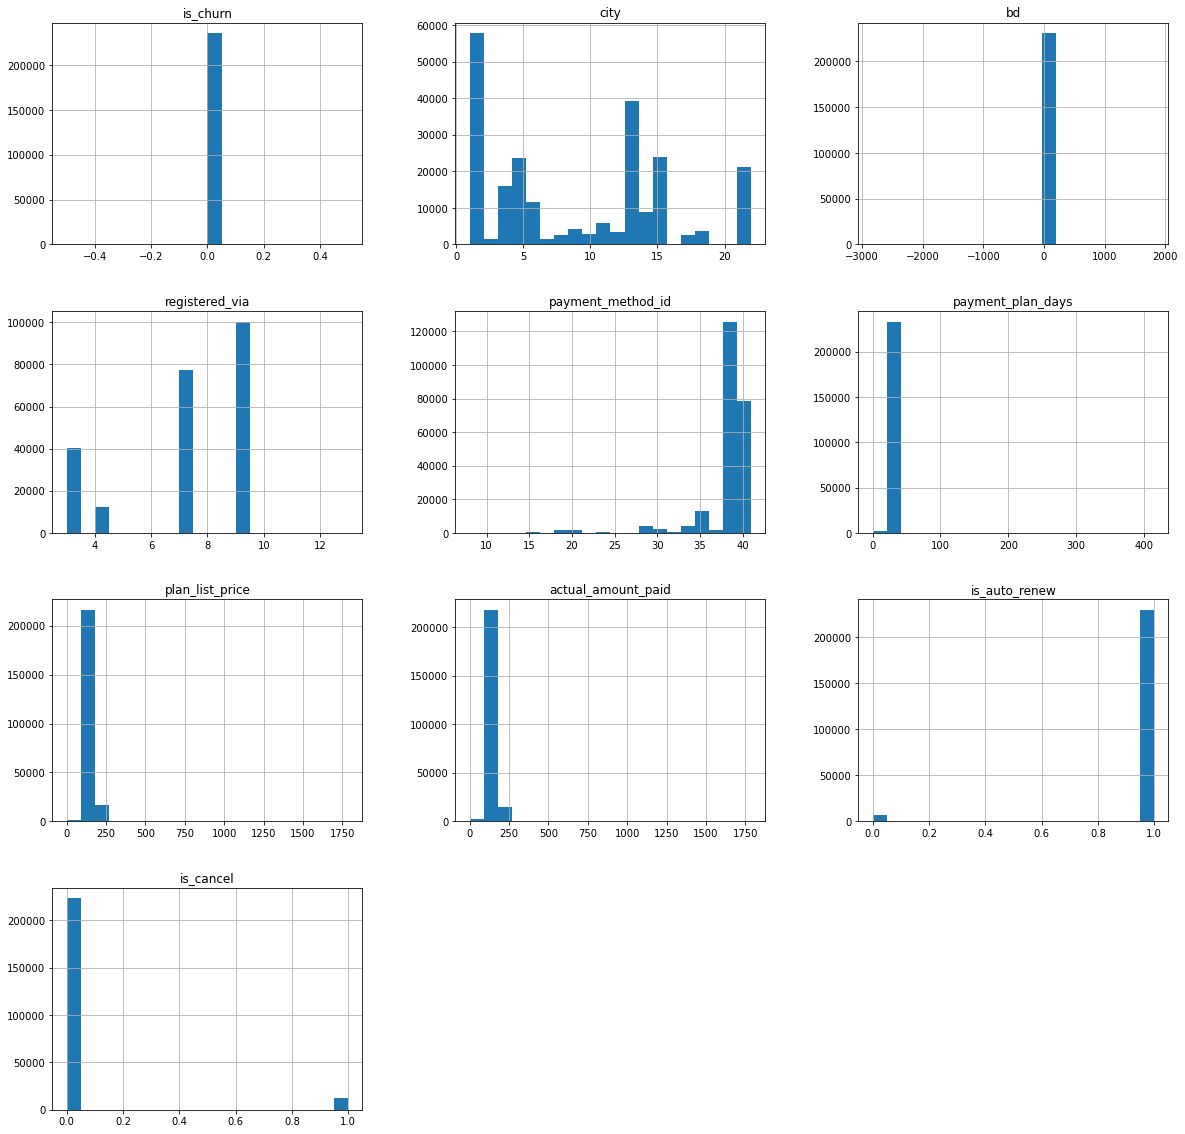

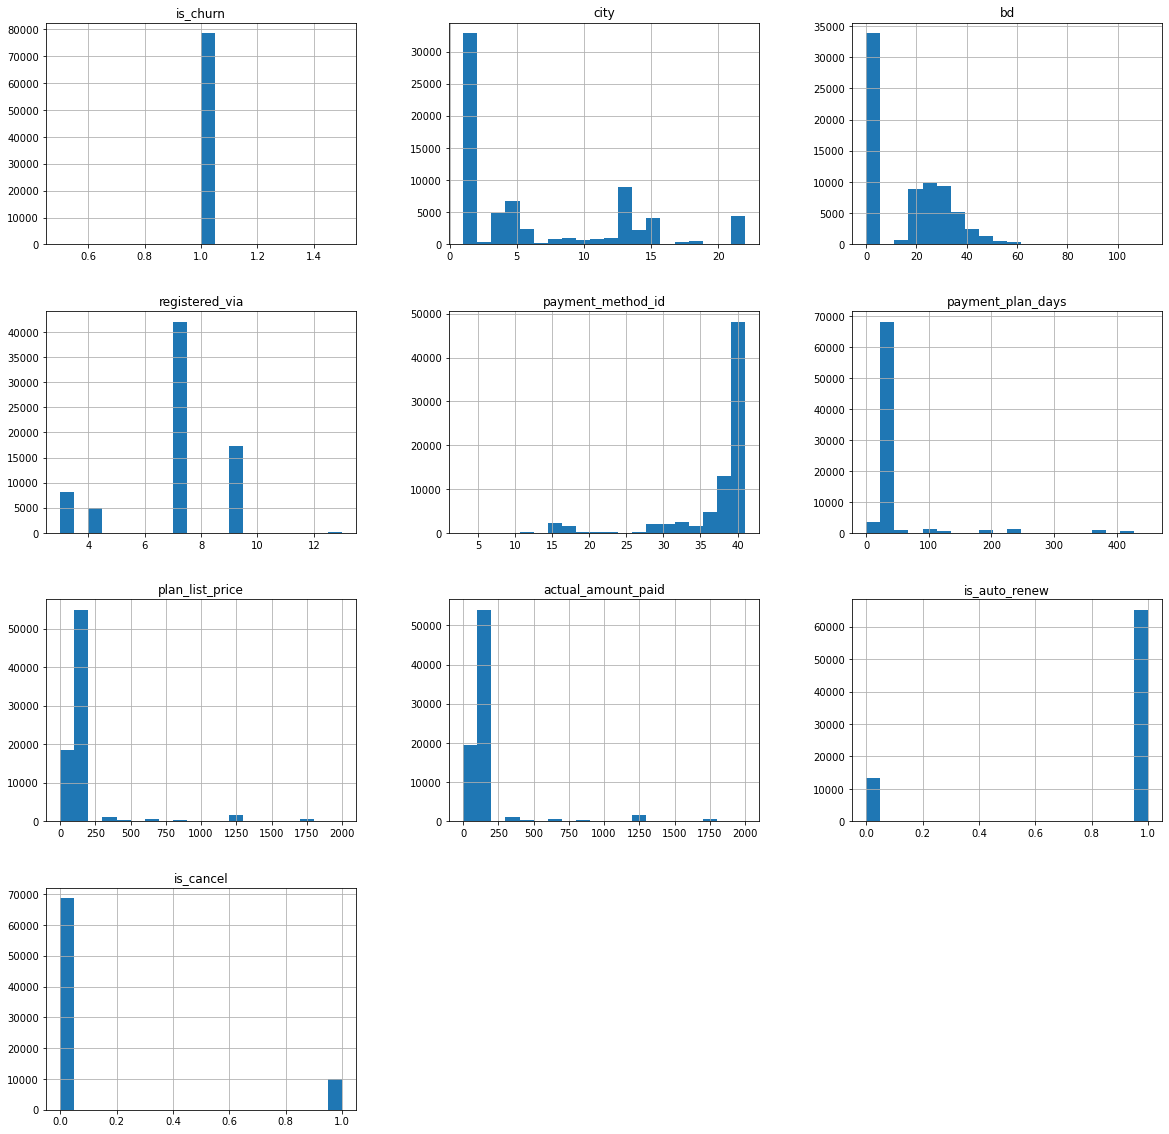

In [26]:
df_merge_tra_dupl=df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)]
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0].hist(figsize=(20,20),bins=20)
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1].hist(figsize=(20,20),bins=20)

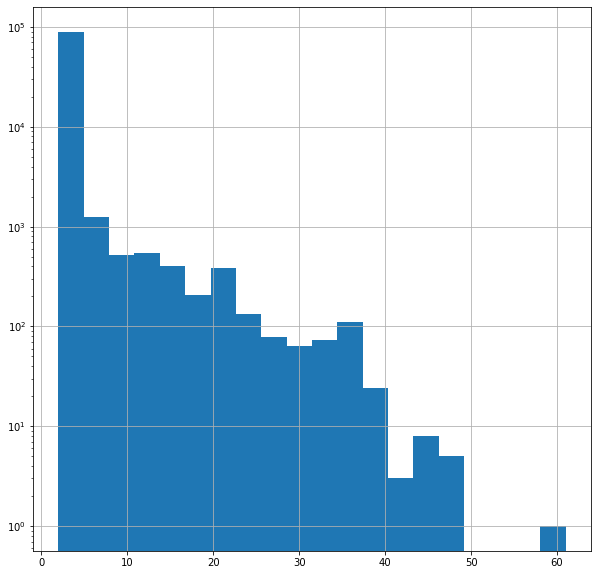

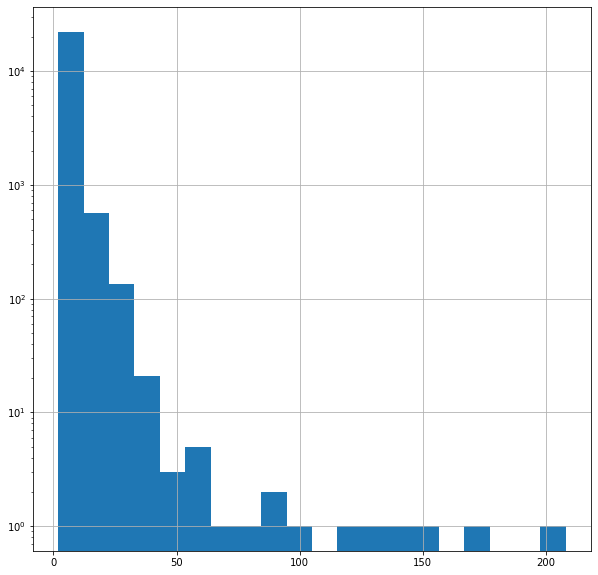

In [36]:
fig, ax = plt.subplots()
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0]["msno"].value_counts().hist(ax=ax,figsize=(10,10),bins=20)
ax.set_yscale('log')
#df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1].hist(figsize=(20,20),bins=20)
fig, ax = plt.subplots()
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1]["msno"].value_counts().hist(ax=ax,figsize=(10,10),bins=20)
ax.set_yscale('log')

In [39]:
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0]["msno"].value_counts()

f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=    61
mg+IeEqwTD8RIi3MD3InzWbebMVApP/MN3WSCKtw0Tw=    49
GUlOynwcbchLoK1DjZ9pMqC3HiK1BOGDV3g4xuUeNA0=    48
LGOag59N/meew/Jk/Xy8Qz3hzN0W9sganmMvEze6RqI=    48
WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=    48
                                                ..
b9JfDN1ZUdIdXmXrVl0CPny6FIWJ2s47zSuXYNWPC90=     2
UoU0CaxdZlxA4PbBQDzF6KCnJSv2Q8jglu2VIP3zq+U=     2
zeQ80ktHHpuDd/w7A3f+u5+eCTj/HxLB15cKVbwcVc4=     2
T4nHVVostBw40hsqY7k5V03+ltxK4qr3ALcw55yQMQQ=     2
SQT87BGwq69aKDe6H0m32iVDDbJ/uw9j8NrLuTwsMy4=     2
Name: msno, Length: 93069, dtype: int64

In [43]:
df_merge_tra_dupl[df_merge_tra_dupl['msno']=="f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg="].sort_values(by=["transaction_date"]).head(50)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
918962,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-06,2019-01-20,0.0
918966,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-06,2018-12-20,0.0
918919,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,119.0,1.0,2015-01-14,2019-02-20,0.0
918939,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-16,2019-03-23,0.0
918959,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-25,2019-04-23,0.0
918945,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-06,2019-05-21,0.0
918952,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-06,2019-06-18,0.0
918924,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,119.0,1.0,2015-02-14,2019-07-16,0.0
918921,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-16,2019-08-13,0.0
918936,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-25,2019-09-10,0.0


In [55]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==1) & (df_merge_tra_dupl["plan_list_price"]==0)]["msno"].value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
u5R0/cXXJ1vdxqRm2pwDJQT4J19D2uIcgtDqaj8mIL0=      1
Ai6FLb6LAp2R/w1/Q5gOr5jDvMLkeor2tWvk/+H43es=      1
z0M9oVaRxrC4apw3FL3T6eXzFLBpU3grsWjLYtBIOys=      1
FIEPM1qfEpG/xihpNJ8ihILNGK+pLx0eFhOHQzB1B78=      1
YYeUyr8RgQ9fSCTiD8qH1fN27czgXbldPFwejtwhroo=      1
Name: msno, Length: 2816, dtype: int64

In [57]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==1) & (df_merge_tra_dupl["plan_list_price"]!=0)]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0
5,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-07-08,0.0
6,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-12-08,2017-12-08,0.0
7,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-11-08,2017-10-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759103,Zip8Ez1Peajv5AlJSpv8j0DnjBb+pZFM6PoPzXUFOME=,1,7.0,0.0,male,7.0,2013-12-07,41.0,30.0,149.0,149.0,1.0,2017-03-06,2017-04-06,0.0
759104,KVkLiprWmp6IG5/HUQ0UqQfqAiPNYp5CsoEzMSMmSfI=,1,1.0,23.0,NaN,7.0,2013-12-13,15.0,90.0,300.0,300.0,0.0,2017-03-06,2017-06-03,0.0
759105,KVkLiprWmp6IG5/HUQ0UqQfqAiPNYp5CsoEzMSMmSfI=,1,1.0,23.0,NaN,7.0,2013-12-13,15.0,60.0,300.0,300.0,0.0,2017-03-04,2017-05-04,0.0
759107,Q6L1h1lV6R2Uc+yPbbdg+cQXHMZP3mH123gssPm7ODc=,1,1.0,0.0,NaN,7.0,2013-12-18,41.0,30.0,99.0,99.0,1.0,2017-02-08,2017-04-07,0.0


In [50]:
df_merge_tra_dupl[df_merge_tra_dupl['msno']=="SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0="].sort_values(by=["actual_amount_paid"]).head(210)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
39847,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2017-11-02,0.0
39942,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2019-04-06,0.0
39941,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2018-01-31,0.0
39940,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2020-08-18,0.0
39939,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2019-11-22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39883,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2018-10-28,0.0
39882,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2018-06-20,0.0
39881,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2017-07-05,0.0
39879,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2019-12-22,0.0


In [59]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==0) & (df_merge_tra_dupl["plan_list_price"]==0)]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
85630,u4a3SRIKXE6+DPK3qOUcork0Lb32LoCdHYCZ5wlnvi4=,0,7.0,23.0,male,7.0,2012-01-06,41.0,0.0,0.0,149.0,1.0,2015-04-26,2017-06-27,0.0
85647,u4a3SRIKXE6+DPK3qOUcork0Lb32LoCdHYCZ5wlnvi4=,0,7.0,23.0,male,7.0,2012-01-06,41.0,0.0,0.0,149.0,1.0,2015-04-26,2017-07-27,0.0
86056,frBD64kNyPlcG/7BjY0byOdKBIkiJUbgAgp8WZdOGNk=,0,1.0,0.0,NaN,7.0,2013-01-08,41.0,0.0,0.0,149.0,1.0,2015-05-07,2018-07-04,0.0
86066,frBD64kNyPlcG/7BjY0byOdKBIkiJUbgAgp8WZdOGNk=,0,1.0,0.0,NaN,7.0,2013-01-08,41.0,0.0,0.0,149.0,1.0,2015-05-08,2018-08-04,0.0
86069,frBD64kNyPlcG/7BjY0byOdKBIkiJUbgAgp8WZdOGNk=,0,1.0,0.0,NaN,7.0,2013-01-08,41.0,0.0,0.0,149.0,1.0,2015-05-11,2018-09-04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165497,zWdQyxBrt0ndUCZwwLCHElQug8yGTgIl8BBEeWA0a3E=,0,1.0,0.0,NaN,7.0,2013-10-21,41.0,0.0,0.0,119.0,1.0,2015-04-27,2017-05-16,0.0
1166127,+EhVG9ySOp6AgwMM9IUOe/zwNvjOYtWhTAjKhzNx9sk=,0,1.0,17.0,female,3.0,2014-11-15,17.0,60.0,0.0,0.0,0.0,2017-03-29,2017-04-01,0.0
1166430,xqMqAyi/rhq/Wmdr9wDOIW9pFc1i2E3Vmi5QVtBX2c8=,0,5.0,18.0,male,3.0,2015-07-17,17.0,120.0,0.0,0.0,0.0,2017-03-28,2017-04-22,0.0
1167054,jF8SoG+yuieItxgBuJS7NkgAxh+Q1+lW8kulMasIpgo=,0,5.0,19.0,male,4.0,2015-12-19,17.0,60.0,0.0,0.0,0.0,2017-03-23,2017-04-24,0.0


In [60]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==0) & (df_merge_tra_dupl["plan_list_price"]==0)]["msno"].value_counts()

PtO8GiaYp9zOm0NYSLgQDCPpMCwI6PAQtBO2Fm8ERBs=    5
++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=    5
7zVj7hq7W8ivp72I4c4n4ZPu2sK48GQZsBqvbHkYtYo=    5
mFE7bNK4EqZJ7I5KEa0jsii9LaHIW0elj4xVp64K9R8=    4
eEKRt2JlEh6drVzpaTuFRwfYr7IKb5+YsyKxW3fWG8I=    4
                                               ..
jWvW2w/SxTQ7Lo0BSOy0t/FuV8PefNBMhX/fdQJ8UoE=    1
v8Qqg7+gbnfu+XKcI2xilXmO+cOqI1hhDP0EN/qAuic=    1
WWgZi8OvBbyn6d6TjYrSto+nN3qLnGEOTqmFMN1XAnY=    1
uMPtb1fE3rXPTlJTCAnoFbhtztSTVGbMwG8J4lzAzyM=    1
5JLvU2uR53Tz4M+49eO0BuaArCLVkON8cxh9b+/DEfg=    1
Name: msno, Length: 1153, dtype: int64